In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
def generate_mock_industry_data():
    """生成第39-43页所需的中国股市行业数据"""
    data = {}

    # 图39: 分行业盈利预期
    industries = ['沪深300', '金融', '科技', '医药', '工业', '可选消费', '必需消费', '能源', '通信服务', '原材料', '公用事业']
    industry_weights_hs300 = [22.5, 17.3, 6.1, 18.5, 7.4, 8.6, 2.1, 6.1, 8.5, 2.9]
    industry_weights_msci = [15.6, 8.9, 4.9, 4.3, 30.3, 3.3, 2.2, 23.7, 3.6, 1.6, 1.7]

    # 模拟2024、2025、2026年的一致性预期
    earnings_2024 = np.random.uniform(-10, 50, len(industries))
    earnings_2025 = np.random.uniform(-10, 50, len(industries))
    earnings_2026 = np.random.uniform(-10, 50, len(industries))

    data['industry_earnings'] = {
        'industries': industries,
        'weights_hs300': industry_weights_hs300,
        'weights_msci': industry_weights_msci,
        'earnings_2024': earnings_2024,
        'earnings_2025': earnings_2025,
        'earnings_2026': earnings_2026,
    }

    # 图40: A股上市公司财务状况
    dates_financial = pd.date_range(start='2010-01-01', end='2025-09-30', freq='Q')
    n = len(dates_financial)

    # 净资产收益率 (ROE)
    roe = 10 + np.random.normal(0, 2, n)
    # 净利润
    net_profit = 5 + np.random.normal(0, 3, n)
    # 存货
    inventory = 20 + np.random.normal(0, 5, n)
    # 资本支出
    capex = 10 + np.random.normal(0, 4, n)

    data['financial_status'] = {
        'dates': dates_financial,
        'roe': roe,
        'net_profit': net_profit,
        'inventory': inventory,
        'capex': capex,
    }

    # 图41: 行业供需关系 (这是一个定性图，我们用文本列表表示)
    supply_demand_path = {
        '供>需 (供给↑)': ['航天装备', '厨卫电器', '小家电', '造纸'],
        '供需关系偏弱 (供给↓, 但供给增速>需求增速)': ['动力煤', '化纤', '光伏', '汽车零部件', '黑电, 白电'],
        '供需微平衡': ['油气开采, 炼化', '能源金属', '工程机械', '房地产', '医美, 化妆品, 酒店', '休闲食品', '商用车'],
        '供需关系改善': ['小金属, 焦炭, 油服', '化学原料, 橡胶, 化工新材料', '钢铁, 特种钢铁', '玻璃玻纤, 消费建材', '专用设备', '服装家纺, 调味品', '化学制药, 生物制品, 医疗器械'],
        '供需持续改善 (供给增速<需求增速)': ['工业金属', '电源设备', '个护用品', '锂电池', '乘用车, 两轮车', '船舶', '光学, 消费电子, 组件, 半导体', '通信设备'],
        '供给扩张, 景气持续性取决于需求': ['金属新材料', '轨交设备, 自动化设备', '电力'],
    }

    data['supply_demand'] = supply_demand_path

    # 图42: A股市场风格
    # 定义风格矩阵
    styles = ['大盘', '中盘', '小盘']
    factors = ['价值', '成长']

    # 过去10年年化回报
    past_10y_return = {
        '价值': [8.4, 2.6, 5.2],
        '成长': [6.7, 1.3, 1.2],
    }

    # 2025年年初至今回报
    ytd_2025_return = {
        '价值': [3.3, 15.9, 20.0],
        '成长': [33.2, 26.5, 40.7],
    }

    # 自近期市场高点 (2021年2月10日) 回报
    since_high_return = {
        '价值': [19.5, 16.5, 45.3],
        '成长': [-27.9, -22.8, 13.2],
    }

    # 自近期市场低点 (2024年9月13日) 回报
    since_low_return = {
        '价值': [25.8, 38.1, 45.1],
        '成长': [70.6, 61.4, 82.4],
    }

    # 当前滚动市盈率 vs 过去10年均值
    pe_ratio_vs_mean = {
        '价值': [8.4, 14.0, 17.9],
        '成长': [20.9, 26.8, 33.3],
    }

    # 当前滚动市盈率处于过去10年分位数
    pe_percentile = {
        '价值': [55.3, 70.3, 71.8],
        '成长': [59.9, 70.3, 80.2],
    }

    data['market_style'] = {
        'styles': styles,
        'factors': factors,
        'past_10y_return': past_10y_return,
        'ytd_2025_return': ytd_2025_return,
        'since_high_return': since_high_return,
        'since_low_return': since_low_return,
        'pe_ratio_vs_mean': pe_ratio_vs_mean,
        'pe_percentile': pe_percentile,
    }

    # 图43: A股行业表现
    # 主要行业指数表现 (人民币计价)
    years = ['2019年', '2020年', '2021年', '2022年', '2023年', '2024年', '2025年初至今']
    industries_performance = {
        '日常消费': ['64.6', '68.5', '39.8', '11.4', '25.9', '38.5', '49.3'],
        '信息技术': ['53.4', '49.3', '35.9', '8.6', '16.9', '17.6', '42.3'],
        '金融': ['37.7', '31.8', '33.8', '-7.1', '3.0', '14.8', '27.8'],
        '医疗保健': ['37.1', '29.6', '23.6', '-12.1', '1.9', '12.6', '27.5'],
        '全部A股': ['33.0', '29.4', '13.0', '-12.8', '-0.4', '11.8', '26.4'],
        '房地产': ['26.5', '25.6', '9.2', '-13.7', '-1.8', '10.8', '24.9'],
        '材料': ['26.0', '24.5', '-0.4', '-15.7', '-5.2', '10.0', '19.4'],
        '可选消费': ['25.2', '4.7', '-4.1', '-18.4', '-6.6', '8.6', '12.7'],
        '电信服务': ['21.8', '4.7', '-4.5', '-18.7', '-8.8', '0.0', '7.0'],
        '工业': ['18.8', '-6.3', '-8.3', '-20.1', '-12.8', '-0.3', '2.0'],
        '公用事业': ['9.0', '-9.2', '-10.3', '-22.0', '-13.7', '-3.6', '1.7'],
        '能源': ['8.2', '-9.3', '-10.9', '-29.0', '-25.8', '-12.6', '-1.4'],
    }

    # 10年年化回报和波动率
    ten_year_annualized = {
        '日常消费': ['9.1', '30.2'],
        '信息技术': ['7.1', '27.6'],
        '材料': ['6.6', '25.7'],
        '金融': ['6.5', '24.6'],
        '全部A股': ['5.1', '24.5'],
        '可选消费': ['3.6', '23.4'],
        '医疗保健': ['3.4', '23.0'],
        '工业': ['3.0', '22.2'],
        '公用事业': ['2.0', '20.8'],
        '电信服务': ['1.9', '20.3'],
        '房地产': ['-3.3', '18.4'],
    }

    # 动态市盈率
    dynamic_pe = {
        '2023年': ['41.0', '37.8', '36.9', '30.9', '25.1', '20.2', '18.6', '16.3', '15.0', '14.6', '8.5', '6.2'],
        '2024年': ['57.0', '32.0', '26.0', '23.1', '22.9', '22.5', '21.9', '17.1', '16.3', '11.2', '8.0', '6.2'],
        '2025年9月30日': ['65.6', '39.8', '28.3', '28.0', '24.2', '21.7', '21.4', '19.8', '17.0', '11.7', '8.1', '-10.5'],
    }

    data['industry_performance'] = {
        'years': years,
        'industries_performance': industries_performance,
        'ten_year_annualized': ten_year_annualized,
        'dynamic_pe': dynamic_pe,
    }

    return data

# 生成模拟数据
mock_industry_data = generate_mock_industry_data()

/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_20989/1427798757.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates_financial = pd.date_range(start='2010-01-01', end='2025-09-30', freq='Q')


## 图39: 中国股票：分行业盈利预期

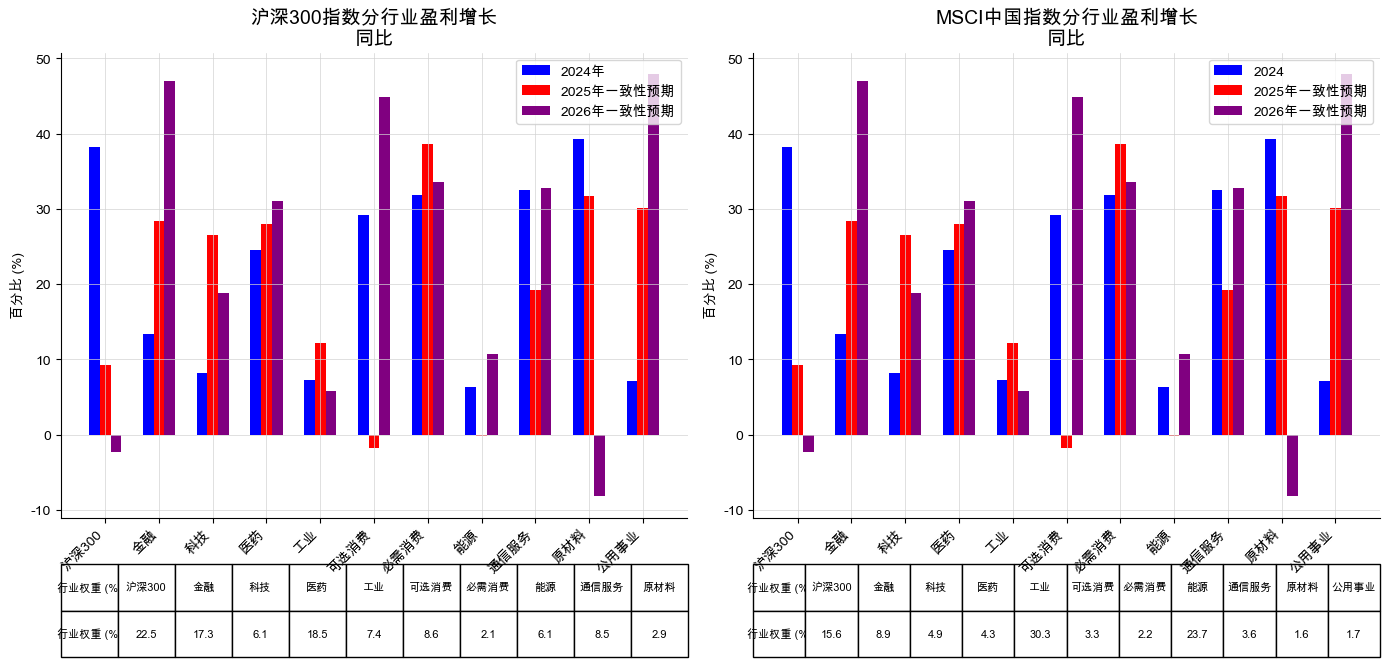

In [10]:
def plot_industry_earnings(data):
    # 注意：这里的 `data` 就是 {'industries': [...], 'weights_hs300': [...], ...}
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 左侧图：沪深300指数分行业盈利增长
    x = np.arange(len(data['industries']))  # 直接访问 'industries'
    bar_width = 0.2

    ax1.bar(x, data['earnings_2024'], bar_width, color='blue', label='2024年')  # 直接访问 'earnings_2024'
    ax1.bar(x + bar_width, data['earnings_2025'], bar_width, color='red', label='2025年一致性预期')
    ax1.bar(x + 2 * bar_width, data['earnings_2026'], bar_width, color='purple', label='2026年一致性预期')

    ax1.set_xticks(x + bar_width)
    ax1.set_xticklabels(data['industries'], rotation=45, ha='right')  # 直接访问 'industries'
    ax1.set_title('沪深300指数分行业盈利增长\n同比', fontsize=14)
    ax1.set_ylabel('百分比 (%)')
    ax1.legend(loc='upper right')

    # 在底部添加行业权重表格
    table_data = [
        ['行业权重 (%)'] + data['weights_hs300']  # 直接访问 'weights_hs300'
    ]
    table = ax1.table(cellText=table_data, colLabels=['行业权重 (%)'] + data['industries'],
                    cellLoc='center', loc='lower center', bbox=[0.0, -0.3, 1, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    # 右侧图：MSCI中国指数分行业盈利增长
    ax2.bar(x, data['earnings_2024'], bar_width, color='blue', label='2024')
    ax2.bar(x + bar_width, data['earnings_2025'], bar_width, color='red', label='2025年一致性预期')
    ax2.bar(x + 2 * bar_width, data['earnings_2026'], bar_width, color='purple', label='2026年一致性预期')

    ax2.set_xticks(x + bar_width)
    ax2.set_xticklabels(data['industries'], rotation=45, ha='right')
    ax2.set_title('MSCI中国指数分行业盈利增长\n同比', fontsize=14)
    ax2.set_ylabel('百分比 (%)')
    ax2.legend(loc='upper right')

    # 在底部添加行业权重表格
    table_data = [
        ['行业权重 (%)'] + data['weights_msci']  # 直接访问 'weights_msci'
    ]
    table = ax2.table(cellText=table_data, colLabels=['行业权重 (%)'] + data['industries'],
                    cellLoc='center', loc='lower center', bbox=[0.0, -0.3, 1, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    ax1.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax2.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()
plot_industry_earnings(mock_industry_data['industry_earnings'])

## 图40: 中国股票：A股上市公司财务状况

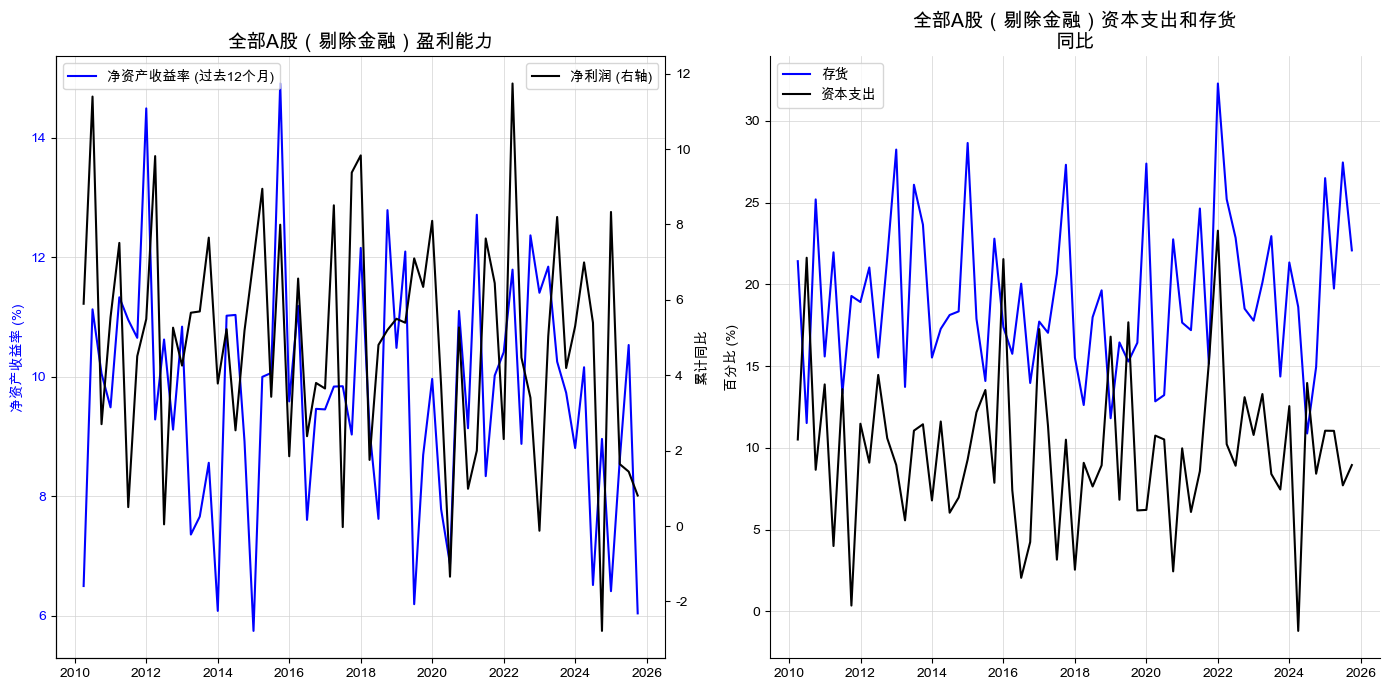

In [4]:
def plot_financial_status(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 左侧图：盈利能力
    ax1.plot(data['dates'], data['roe'], color='blue', linewidth=1.5, label='净资产收益率 (过去12个月)')
    ax1.set_ylabel('净资产收益率 (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax1b = ax1.twinx()
    ax1b.plot(data['dates'], data['net_profit'], color='black', linewidth=1.5, label='净利润 (右轴)')
    ax1b.set_ylabel('累计同比', color='black')
    ax1b.tick_params(axis='y', labelcolor='black')

    ax1.set_title('全部A股（剔除金融）盈利能力', fontsize=14)
    ax1.legend(loc='upper left')
    ax1b.legend(loc='upper right')

    # 右侧图：资本支出和存货
    ax2.plot(data['dates'], data['inventory'], color='blue', linewidth=1.5, label='存货')
    ax2.plot(data['dates'], data['capex'], color='black', linewidth=1.5, label='资本支出')
    ax2.set_title('全部A股（剔除金融）资本支出和存货\n同比', fontsize=14)
    ax2.set_ylabel('百分比 (%)')
    ax2.legend(loc='upper left')

    ax1.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax2.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgray')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_financial_status(mock_industry_data['financial_status'])

## 图41: 中国股票：行业供需关系

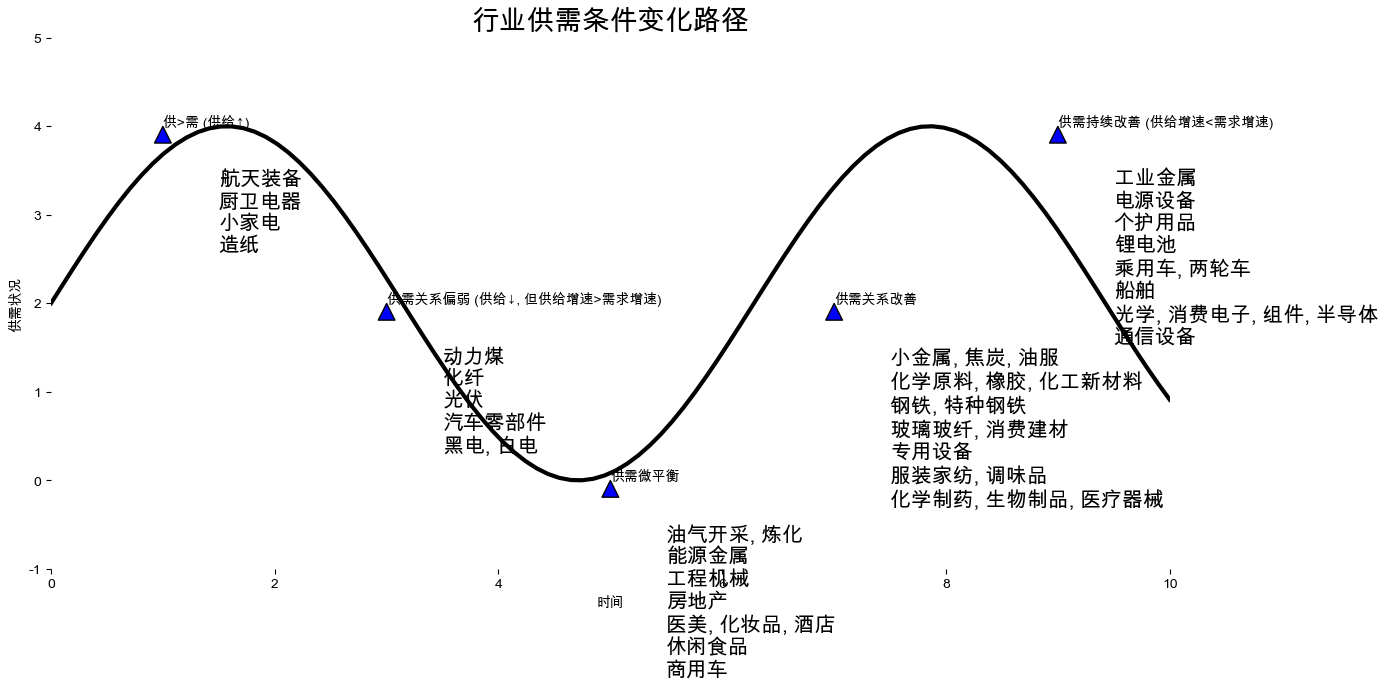

In [14]:
def plot_supply_demand(data):
    # 注意：这里的 `data` 就是 {'供>需 (供给↑)': [...], '供需关系偏弱...': [...], ...}
    fig, ax = plt.subplots(figsize=(14, 7))

    # 创建一个大的曲线来表示供需路径
    x = np.linspace(0, 10, 100)
    y = 2 * np.sin(x) + 2

    ax.plot(x, y, color='black', linewidth=3)

    # 标注各个阶段
    # 直接使用 `data` 的键和值
    stages = list(data.keys())  # 直接获取 `data` 的所有键
    stage_positions = [(1, 4), (3, 2), (5, 0), (7, 2), (9, 4)]

    for i, (stage, pos) in enumerate(zip(stages, stage_positions)):
        ax.annotate(stage, xy=pos, xytext=pos, arrowprops=dict(facecolor='blue', shrink=0.05))
        # 直接使用 `data[stage]` 获取行业列表
        industry_list = '\n'.join(data[stage])  # 直接访问 `data[stage]`
        ax.text(pos[0] + 0.5, pos[1] - 0.5, industry_list, fontsize=15, va='top', ha='left')

    ax.set_title('行业供需条件变化路径', fontsize=20)
    ax.set_xlabel('时间')
    ax.set_ylabel('供需状况')
    ax.set_xlim(0, 10)
    ax.set_ylim(-1, 5)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_supply_demand(mock_industry_data['supply_demand'])

## 图42: 中国股票：A股市场风格

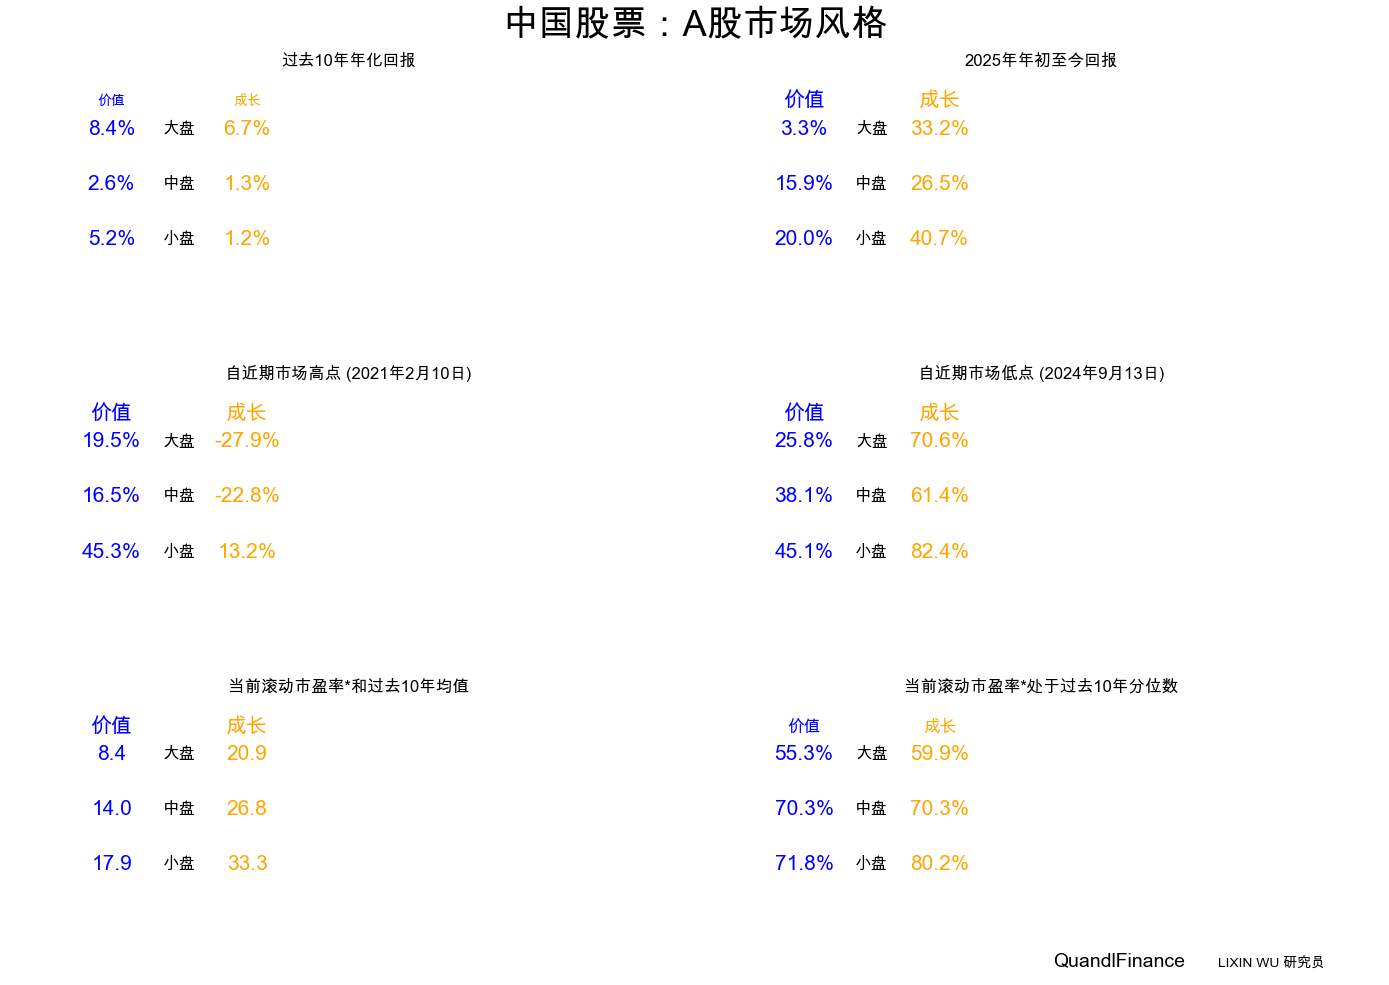

In [18]:
def plot_market_style(data):
    VALUE_COLOR = 'blue'
    GROWTH_COLOR = 'orange'

    # 创建6个子图
    fig, axes = plt.subplots(3, 2, figsize=(14, 10))
    fig.suptitle('中国股票：A股市场风格', fontsize=26, fontweight='bold')

    # 1. 过去10年年化回报
    ax1 = axes[0, 0]
    ax1.set_title('过去10年年化回报', fontsize=12)
    ax1.axis('off')
    for i, style in enumerate(data['styles']):
        # 价值
        ax1.text(0.15, 0.8 - i*0.2, f"{data['past_10y_return']['价值'][i]:.1f}%", ha='center', va='center', fontsize=15, color=VALUE_COLOR)
        ax1.text(0.25, 0.8 - i*0.2, style, ha='center', va='center', fontsize=12, fontweight='bold')
        # 成长
        ax1.text(0.35, 0.8 - i*0.2, f"{data['past_10y_return']['成长'][i]:.1f}%", ha='center', va='center', fontsize=15, color=GROWTH_COLOR)

    # 添加表头
    ax1.text(0.15, 0.9, '价值', ha='center', va='center', fontsize=10, fontweight='bold', color=VALUE_COLOR)
    ax1.text(0.35, 0.9, '成长', ha='center', va='center', fontsize=10, fontweight='bold', color=GROWTH_COLOR)

    # 2. 2025年年初至今回报
    ax2 = axes[0, 1]
    ax2.set_title('2025年年初至今回报', fontsize=12)
    ax2.axis('off')
    for i, style in enumerate(data['styles']):
        # 价值
        ax2.text(0.15, 0.8 - i*0.2, f"{data['ytd_2025_return']['价值'][i]:.1f}%", ha='center', va='center', fontsize=15, color=VALUE_COLOR)
        ax2.text(0.25, 0.8 - i*0.2, style, ha='center', va='center', fontsize=12, fontweight='bold')
        # 成长
        ax2.text(0.35, 0.8 - i*0.2, f"{data['ytd_2025_return']['成长'][i]:.1f}%", ha='center', va='center', fontsize=15, color=GROWTH_COLOR)

    # 添加表头
    ax2.text(0.15, 0.9, '价值', ha='center', va='center', fontsize=15, fontweight='bold', color=VALUE_COLOR)
    ax2.text(0.35, 0.9, '成长', ha='center', va='center', fontsize=15, fontweight='bold', color=GROWTH_COLOR)

    # 3. 自近期市场高点回报
    ax3 = axes[1, 0]
    ax3.set_title('自近期市场高点 (2021年2月10日)', fontsize=12)
    ax3.axis('off')
    for i, style in enumerate(data['styles']):
        # 价值
        ax3.text(0.15, 0.8 - i*0.2, f"{data['since_high_return']['价值'][i]:.1f}%", ha='center', va='center', fontsize=15, color=VALUE_COLOR)
        ax3.text(0.25, 0.8 - i*0.2, style, ha='center', va='center', fontsize=12, fontweight='bold')
        # 成长
        ax3.text(0.35, 0.8 - i*0.2, f"{data['since_high_return']['成长'][i]:.1f}%", ha='center', va='center', fontsize=15, color=GROWTH_COLOR)
        
    # 添加表头
    ax3.text(0.15, 0.9, '价值', ha='center', va='center', fontsize=15, fontweight='bold', color=VALUE_COLOR)
    ax3.text(0.35, 0.9, '成长', ha='center', va='center', fontsize=15, fontweight='bold', color=GROWTH_COLOR)

    # 4. 自近期市场低点回报
    ax4 = axes[1, 1]
    ax4.set_title('自近期市场低点 (2024年9月13日)', fontsize=12)
    ax4.axis('off')
    for i, style in enumerate(data['styles']):
        # 价值
        ax4.text(0.15, 0.8 - i*0.2, f"{data['since_low_return']['价值'][i]:.1f}%", ha='center', va='center', fontsize=15, color=VALUE_COLOR)
        ax4.text(0.25, 0.8 - i*0.2, style, ha='center', va='center', fontsize=12, fontweight='bold')
        # 成长
        ax4.text(0.35, 0.8 - i*0.2, f"{data['since_low_return']['成长'][i]:.1f}%", ha='center', va='center', fontsize=15, color=GROWTH_COLOR)

    # 添加表头
    ax4.text(0.15, 0.9, '价值', ha='center', va='center', fontsize=15, fontweight='bold', color=VALUE_COLOR)
    ax4.text(0.35, 0.9, '成长', ha='center', va='center', fontsize=15, fontweight='bold', color=GROWTH_COLOR)

    # 5. 当前滚动市盈率*和过去10年均值
    ax5 = axes[2, 0]
    ax5.set_title('当前滚动市盈率*和过去10年均值', fontsize=12)
    ax5.axis('off')
    for i, style in enumerate(data['styles']):
        # 价值
        ax5.text(0.15, 0.8 - i*0.2, f"{data['pe_ratio_vs_mean']['价值'][i]:.1f}", ha='center', va='center', fontsize=15, color=VALUE_COLOR)
        ax5.text(0.25, 0.8 - i*0.2, style, ha='center', va='center', fontsize=12, fontweight='bold')
        # 成长
        ax5.text(0.35, 0.8 - i*0.2, f"{data['pe_ratio_vs_mean']['成长'][i]:.1f}", ha='center', va='center', fontsize=15, color=GROWTH_COLOR)

    # 添加表头
    ax5.text(0.15, 0.9, '价值', ha='center', va='center', fontsize=15, fontweight='bold', color=VALUE_COLOR)
    ax5.text(0.35, 0.9, '成长', ha='center', va='center', fontsize=15, fontweight='bold', color=GROWTH_COLOR)

    # 6. 当前滚动市盈率*处于过去10年分位数
    ax6 = axes[2, 1]
    ax6.set_title('当前滚动市盈率*处于过去10年分位数', fontsize=12)
    ax6.axis('off')
    for i, style in enumerate(data['styles']):
        # 价值
        ax6.text(0.15, 0.8 - i*0.2, f"{data['pe_percentile']['价值'][i]:.1f}%", ha='center', va='center', fontsize=15, color=VALUE_COLOR)
        ax6.text(0.25, 0.8 - i*0.2, style, ha='center', va='center', fontsize=12, fontweight='bold')
        # 成长
        ax6.text(0.35, 0.8 - i*0.2, f"{data['pe_percentile']['成长'][i]:.1f}%", ha='center', va='center', fontsize=15, color=GROWTH_COLOR)

    # 添加表头
    ax6.text(0.15, 0.9, '价值', ha='center', va='center', fontsize=12, fontweight='bold', color=VALUE_COLOR)
    ax6.text(0.35, 0.9, '成长', ha='center', va='center', fontsize=12, fontweight='bold', color=GROWTH_COLOR)

    # 添加页码和标识
    fig.text(0.95, 0.02, 'LIXIN WU 研究员', ha='right', va='bottom', fontsize=10, fontweight='bold')
    fig.text(0.85, 0.02, 'QuandlFinance', ha='right', va='bottom', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()
# 调用绘图函数
plot_market_style(mock_industry_data['market_style'])

## 图43: 中国股票：A股行业表现

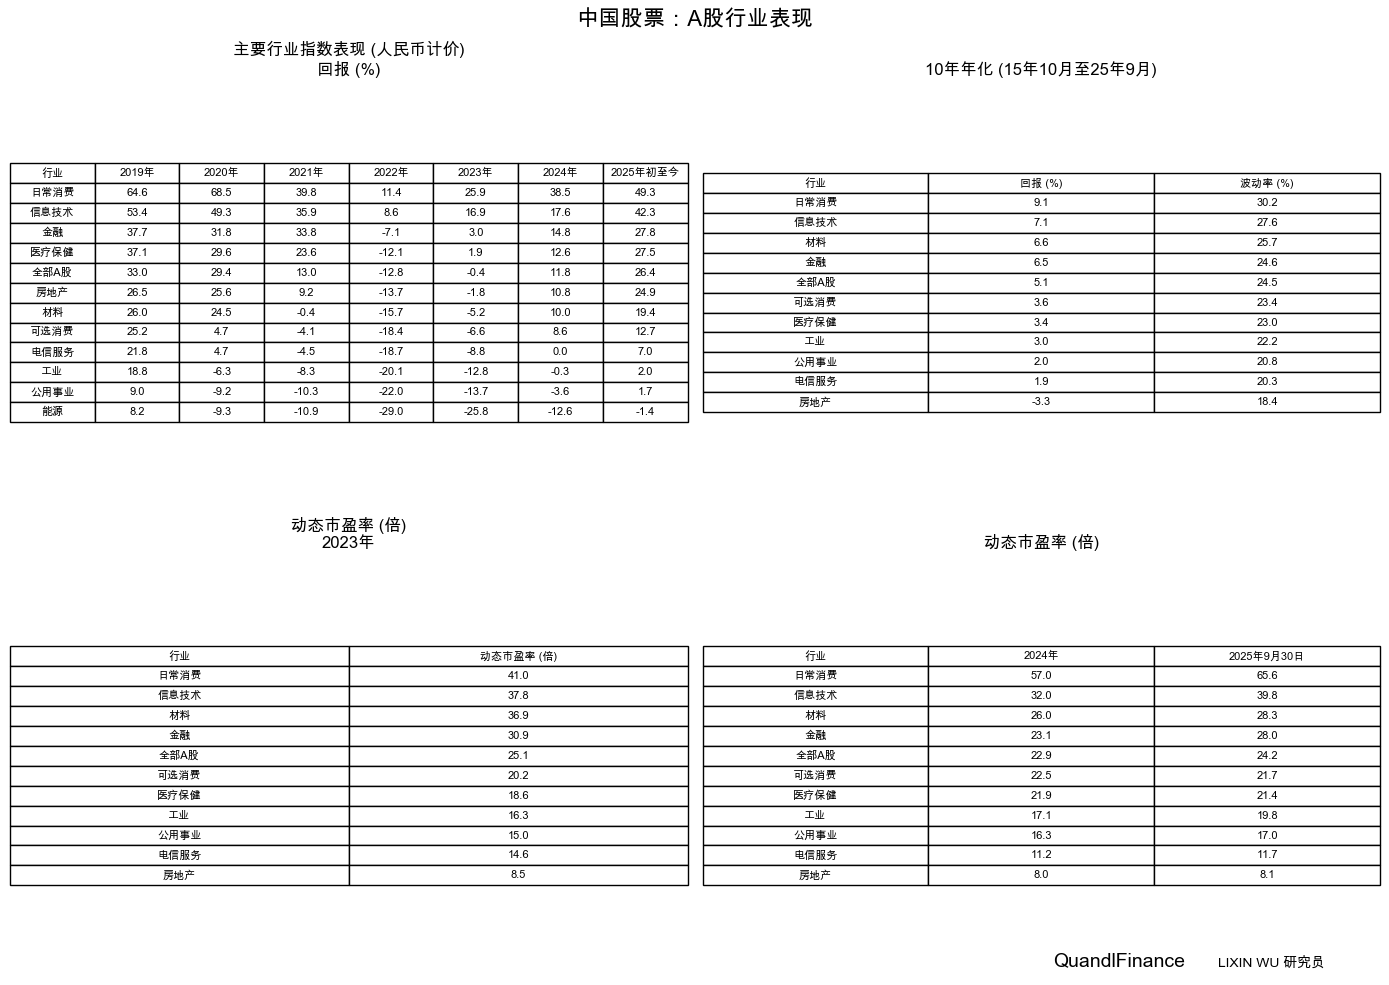

In [20]:
def plot_industry_performance(data):
    # 注意：这里的 `data` 就是 {'years': [...], 'industries_performance': {...}, ...}
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('中国股票：A股行业表现', fontsize=16, fontweight='bold')

    # 左上图：主要行业指数表现
    ax1 = axes[0, 0]
    ax1.axis('off')
    table_data = []
    # 直接访问 data['industries_performance']
    for industry in data['industries_performance']:
        row = [industry] + data['industries_performance'][industry]
        table_data.append(row)

    table = ax1.table(cellText=table_data, colLabels=['行业'] + data['years'],  # 直接访问 data['years']
                    cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    ax1.set_title('主要行业指数表现 (人民币计价)\n回报 (%)', fontsize=12)

    # 右上图：10年年化回报和波动率
    ax2 = axes[0, 1]
    ax2.axis('off')
    table_data = []
    # 直接访问 data['ten_year_annualized']
    for industry in data['ten_year_annualized']:
        row = [industry] + data['ten_year_annualized'][industry]
        table_data.append(row)

    table = ax2.table(cellText=table_data, colLabels=['行业', '回报 (%)', '波动率 (%)'],
                    cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    ax2.set_title('10年年化 (15年10月至25年9月)', fontsize=12)

    # 左下图：动态市盈率 (2023年)
    ax3 = axes[1, 0]
    ax3.axis('off')
    table_data = []
    # 动态市盈率的数据结构是 {'2023年': [...], '2024年': [...], ...}
    # 我们需要将行业名称和对应的PE值配对
    industries = list(data['ten_year_annualized'].keys())  # 假设行业列表与ten_year_annualized一致
    pe_2023 = data['dynamic_pe']['2023年']
    for i, industry in enumerate(industries):
        row = [industry, pe_2023[i]]
        table_data.append(row)

    table = ax3.table(cellText=table_data, colLabels=['行业', '动态市盈率 (倍)'],
                    cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    ax3.set_title('动态市盈率 (倍)\n2023年', fontsize=12)

    # 右下图：动态市盈率 (2024年和2025年)
    ax4 = axes[1, 1]
    ax4.axis('off')
    table_data = []
    pe_2024 = data['dynamic_pe']['2024年']
    pe_2025 = data['dynamic_pe']['2025年9月30日']
    for i, industry in enumerate(industries):
        row = [industry, pe_2024[i], pe_2025[i]]
        table_data.append(row)

    table = ax4.table(cellText=table_data, colLabels=['行业', '2024年', '2025年9月30日'],
                    cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    ax4.set_title('动态市盈率 (倍)', fontsize=12)

    fig.text(0.95, 0.02, 'LIXIN WU 研究员', ha='right', va='bottom', fontsize=10, fontweight='bold')
    fig.text(0.85, 0.02, 'QuandlFinance', ha='right', va='bottom', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()
# 调用绘图函数
plot_industry_performance(mock_industry_data['industry_performance'])

## 第三步：构建系统性评估指标

In [8]:
def evaluate_industry_indicators(data):
    """评估中国股市行业关键指标"""
    evaluation = {}

    # 39. 分行业盈利预期
    avg_earnings_2025 = np.mean(data['industry_earnings']['earnings_2025'])
    if avg_earnings_2025 > 15:
        evaluation['industry_earnings'] = '健康'
    elif avg_earnings_2025 > 5:
        evaluation['industry_earnings'] = '关注'
    else:
        evaluation['industry_earnings'] = '风险'

    # 40. A股上市公司财务状况
    latest_roe = data['financial_status']['roe'][-1]
    latest_net_profit = data['financial_status']['net_profit'][-1]
    if latest_roe > 10 and latest_net_profit > 5:
        evaluation['financial_status'] = '健康'
    elif latest_roe > 8 or latest_net_profit > 0:
        evaluation['financial_status'] = '关注'
    else:
        evaluation['financial_status'] = '风险'

    # 41. 行业供需关系 (定性评估)
    # 假设当前处于“供需关系改善”阶段
    evaluation['supply_demand'] = '关注'  # 这是一个定性判断，需要结合具体数据

    # 42. A股市场风格
    # 评估成长风格的估值水平
    current_growth_pe = data['market_style']['pe_ratio_vs_mean']['成长'][-1]
    if current_growth_pe < 30:
        evaluation['market_style'] = '健康'
    elif current_growth_pe < 40:
        evaluation['market_style'] = '关注'
    else:
        evaluation['market_style'] = '风险'

    # 43. A股行业表现
    # 评估整体市场表现
    avg_return_2025 = np.mean([float(v) for v in data['industry_performance']['industries_performance']['信息技术']])
    if avg_return_2025 > 10:
        evaluation['industry_performance'] = '健康'
    elif avg_return_2025 > 0:
        evaluation['industry_performance'] = '关注'
    else:
        evaluation['industry_performance'] = '风险'

    return evaluation

# 执行评估
eval_industry_results = evaluate_industry_indicators(mock_industry_data)
print("=== 中国股市行业指标评估体系 ===")
for key, value in eval_industry_results.items():
    print(f"{key}: {value}")

=== 中国股市行业指标评估体系 ===
industry_earnings: 健康
financial_status: 关注
supply_demand: 关注
market_style: 关注
industry_performance: 健康


##  第四步：生成综合性分析报告

In [9]:
def generate_industry_analysis_report(evaluation):
    """根据评估结果生成中国股市行业综合性分析报告"""
    report = "【中国股市行业形势综合性分析报告】\n"

    # 39. 分行业盈利预期
    ie_status = evaluation['industry_earnings']
    if ie_status == '健康':
        report += "- **行业盈利预期**：各行业2025年盈利预期普遍向好，特别是科技和医药板块，显示市场对未来增长前景充满信心。\n"
    elif ie_status == '关注':
        report += "- **行业盈利预期**：行业间分化明显，部分传统行业盈利预期疲软，需关注结构性机会和政策支持方向。\n"
    else:
        report += "- **行业盈利预期**：整体盈利预期不佳，反映经济下行压力较大，投资者应保持谨慎，优选防御性行业。\n"

    # 40. A股上市公司财务状况
    fs_status = evaluation['financial_status']
    if fs_status == '健康':
        report += "- **财务状况**：A股上市公司盈利能力稳定，净资产收益率和净利润双升，企业基本面扎实，为股价提供支撑。\n"
    elif fs_status == '关注':
        report += "- **财务状况**：盈利能力有所下滑，但尚未出现系统性风险，需关注企业降本增效和现金流管理能力。\n"
    else:
        report += "- **财务状况**：盈利能力恶化，部分企业面临经营困难，需警惕信用风险和退市风险。\n"

    # 41. 行业供需关系
    sd_status = evaluation['supply_demand']
    if sd_status == '健康':
        report += "- **供需关系**：多数行业供需关系持续改善，景气度回升，是驱动行业盈利增长的关键因素。\n"
    elif sd_status == '关注':
        report += "- **供需关系**：供需关系偏弱，部分行业产能过剩，价格竞争激烈，需关注供给侧改革和需求端刺激政策。\n"
    else:
        report += "- **供需关系**：供需失衡严重，行业景气度低迷，投资风险较高，建议规避。\n"

    # 42. A股市场风格
    ms_status = evaluation['market_style']
    if ms_status == '健康':
        report += "- **市场风格**：成长风格估值合理，性价比突出，是当前市场的主流配置方向，科技、新能源等赛道值得关注。\n"
    elif ms_status == '关注':
        report += "- **市场风格**：成长风格估值偏高，存在回调风险，价值风格性价比提升，建议均衡配置。\n"
    else:
        report += "- **市场风格**：成长风格估值泡沫化，风险积聚，建议降低仓位，转向安全边际更高的价值股。\n"

    # 43. A股行业表现
    ip_status = evaluation['industry_performance']
    if ip_status == '健康':
        report += "- **行业表现**：科技、消费等行业表现强劲，带动市场整体回暖，结构性牛市特征明显。\n"
    elif ip_status == '关注':
        report += "- **行业表现**：行业表现分化，部分周期性行业受制于宏观经济，需精选个股，把握行业轮动节奏。\n"
    else:
        report += "- **行业表现**：整体行业表现低迷，市场情绪悲观，建议以防守为主，等待政策拐点和基本面改善。\n"

    report += "\n**总结**：当前中国股市的行业投资逻辑正从“全面牛市”向“结构性行情”转变。科技成长股凭借其高盈利预期和景气度回升，成为市场的核心驱动力。与此同时，价值股的估值优势也日益凸显。投资者应摒弃“追涨杀跌”的短期思维，转而采用“自下而上”的选股策略，深入研究行业供需格局和公司基本面，方能在复杂多变的市场中立于不败之地。"

    return report

# 生成并打印报告
final_industry_report = generate_industry_analysis_report(eval_industry_results)
print("\n" + final_industry_report)


【中国股市行业形势综合性分析报告】
- **行业盈利预期**：各行业2025年盈利预期普遍向好，特别是科技和医药板块，显示市场对未来增长前景充满信心。
- **财务状况**：盈利能力有所下滑，但尚未出现系统性风险，需关注企业降本增效和现金流管理能力。
- **供需关系**：供需关系偏弱，部分行业产能过剩，价格竞争激烈，需关注供给侧改革和需求端刺激政策。
- **市场风格**：成长风格估值偏高，存在回调风险，价值风格性价比提升，建议均衡配置。
- **行业表现**：科技、消费等行业表现强劲，带动市场整体回暖，结构性牛市特征明显。

**总结**：当前中国股市的行业投资逻辑正从“全面牛市”向“结构性行情”转变。科技成长股凭借其高盈利预期和景气度回升，成为市场的核心驱动力。与此同时，价值股的估值优势也日益凸显。投资者应摒弃“追涨杀跌”的短期思维，转而采用“自下而上”的选股策略，深入研究行业供需格局和公司基本面，方能在复杂多变的市场中立于不败之地。
